In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
import os
zip_train = zipfile.ZipFile('/content/drive/MyDrive/Oral Cancer.zip', 'r') #Opens the zip file in read mode
zip_train.extractall('/tmp') #Extracts the files into the /tmp folder
zip_train.close()

In [3]:
pip install -U tensorflow-addons


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 13.6 MB/s eta 0:00:00


In [4]:
import torch
import numpy as np

import torchvision
from torch.utils.data import DataLoader
from torch.backends import mps
import matplotlib.pyplot as plt

In [5]:
# Define the transformations
image_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224, 224)),  # Resize the image to 224x224
    torchvision.transforms.ToTensor() # Convert the image to a pytorch tensor
])

In [6]:
!pip install split-folders

In [7]:
! pip install python_splitter
import python_splitter
python_splitter.split_from_folder("/tmp/Oral Cancer", train=0.7, test=0.3)

✅Checking SOURCE directory...
0.7 0 0.3
✅Checking percentage validation...
✅Making required directories...
✅Shuffling data...
✅Getting ready for copying files...

-------------Successfully splitted !!!--------------- 


In [8]:
print(os.listdir('Train_Test_Folder/'))

['test', 'train']


In [9]:
# setup some path variables
project_path = './'

data_path =  '/content/Train_Test_Folder/'
# Define train / test dataset
train_dataset = torchvision.datasets.ImageFolder(data_path + 'train/', transform=image_transform)
test_dataset = torchvision.datasets.ImageFolder(data_path + 'test/', transform=image_transform)

# Check the classes labels
class_labels = train_dataset.classes
print(class_labels)
# Check the number of samples in the train and test dataset
print('Number of images in train set:', len(train_dataset))
print('Number of images in test set:', len(test_dataset))

['Normal', 'Squamous Cell Carcinoma']
Number of images in train set: 7000
Number of images in test set: 3002


Image Shape: torch.Size([3, 224, 224])
Label: Normal


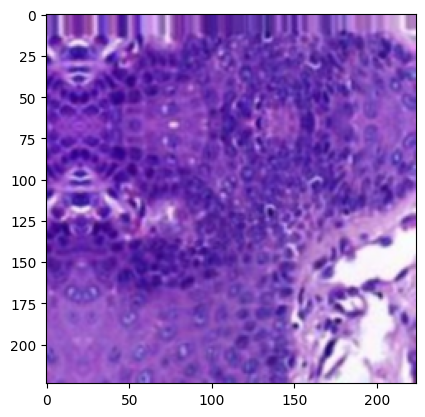

In [10]:
def imshow(img, title=None):
  ''' function to show image '''
  plt.imshow(img.permute(1, 2, 0))
  if title is not None:
    plt.title(title)
  plt.show()
# Show sample image
sample_idx = 240
sample_image, sample_label = train_dataset[sample_idx]
print(f'Image Shape: {sample_image.shape}')
print(f'Label: {class_labels[sample_label]}')

imshow(sample_image)

Shape of image tensors: torch.Size([8, 3, 224, 224])
Shape of label tensors: torch.Size([8])


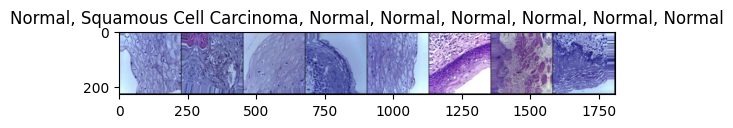

Normal, Squamous Cell Carcinoma, Normal, Normal, Normal, Normal, Normal, Normal
['Normal', 'Squamous Cell Carcinoma', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal']


In [11]:
batch_size = 8

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# get a batch of images and labels
images, labels = next(iter(train_loader))
print(f'Shape of image tensors: {images.shape}')
print(f'Shape of label tensors: {labels.shape}')

# Display the batch of images
class_labels_string = ', '.join([class_labels[label] for label in labels]) # Create a string of class labels indexed by labels
imshow(torchvision.utils.make_grid(images), title = class_labels_string)
# plt.title(class_labels_string)

print(class_labels_string)

print([class_labels[label] for label in labels])

In [12]:
import torch.nn as nn # basic building block for neural neteorks
import torch.nn.functional as F # import convolution functions like Relu

class testmodel(nn.Module):

  def __init__(self, num_classes=2):
    super(testmodel, self).__init__()

    # convolutional layer 1 & max pool layer 1
    self.layer1 = nn.Sequential(
        nn.Conv2d(3, 32, kernel_size=3),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2))

    # convolutional layer 2 & max pool layer 2
    self.layer2 = nn.Sequential(
        nn.Conv2d(32, 64, kernel_size=4),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2))

    self.layer3 = nn.Sequential(
        nn.Conv2d(64, 128, kernel_size=4),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2))

    #Fully connected layer
    self.fc = nn.Linear(128*25*25, num_classes)
  # Feed forward the network
  def forward(self, x):
      out = self.layer1(x)
      out = self.layer2(out)
      out = self.layer3(out)
      out = out.reshape(out.size(0), -1)
      out = self.fc(out)
      return out

In [13]:
# Define the model
net = testmodel()
print(net)

testmodel(
  (layer1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(4, 4), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(4, 4), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=80000, out_features=2, bias=True)
)


In [14]:
import torch
import numpy as np

import torchvision
from torch.utils.data import DataLoader
from torch.backends import mps
import torch.optim as optim
import matplotlib.pyplot as plt

import time

# Assuming net is your model
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

num_epochs = 50

start_time = time.time()
for epoch in range(num_epochs):
    epoch_loss = 0.0
    for batch_index, data in enumerate(train_loader):
        images, labels = data
        optimizer.zero_grad()

        outputs = net(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    print(f'Epoch: {epoch}, Loss: {epoch_loss}')

end_time = time.time()
execution_time = end_time - start_time
print(f"Training completed in {execution_time} seconds")

torch.save(net.state_dict(), project_path + 'oral_net.pth')

net = testmodel()
net.load_state_dict(torch.load(project_path + 'oral_net.pth'))

correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the %d test images: %d %%' % (total, 100 * correct / total))


Epoch: 0, Loss: 602.3485466837883
Epoch: 1, Loss: 589.4754554927349
Epoch: 2, Loss: 568.1858115792274
Epoch: 3, Loss: 544.597325950861
Epoch: 4, Loss: 523.5580114126205
Epoch: 5, Loss: 516.60977602005
Epoch: 6, Loss: 499.9775533378124
Epoch: 7, Loss: 484.0692030489445
Epoch: 8, Loss: 473.7734485864639
Epoch: 9, Loss: 463.5705827623606
Epoch: 10, Loss: 436.4085566550493
Epoch: 11, Loss: 403.24531798809767
Epoch: 12, Loss: 385.20748822391033
Epoch: 13, Loss: 354.8124702498317
Epoch: 14, Loss: 323.29691937565804
Epoch: 15, Loss: 277.04106464609504
Epoch: 16, Loss: 228.8863079259172
Epoch: 17, Loss: 189.11173382215202
Epoch: 18, Loss: 155.44880403392017
Epoch: 19, Loss: 120.47567103791516
Epoch: 20, Loss: 99.25408201303799
Epoch: 21, Loss: 78.63044547659229
Epoch: 22, Loss: 57.345749724510824
Epoch: 23, Loss: 35.89740894084389
Epoch: 24, Loss: 28.27436919657748
Epoch: 25, Loss: 17.71114301474654
Epoch: 26, Loss: 5.6595750503784075
Epoch: 27, Loss: 2.258229812901618
Epoch: 28, Loss: 1.27416

Accuracy of the network on the 26776 test images: 76 %


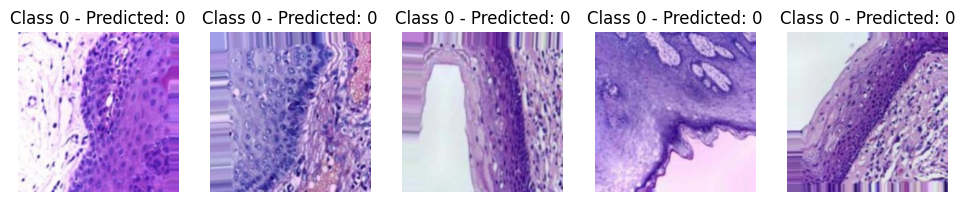

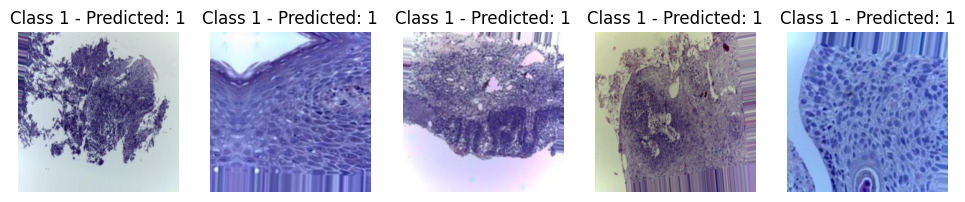

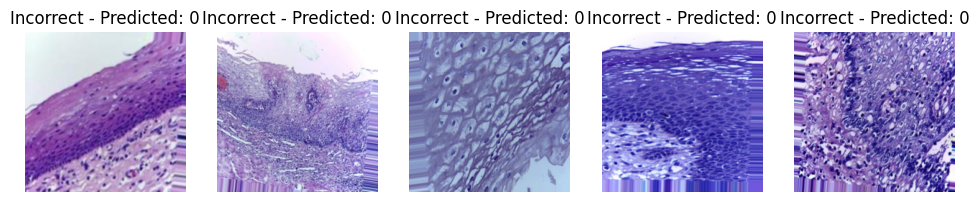

In [24]:
net = testmodel()
net.load_state_dict(torch.load(project_path + 'oral_net.pth'))

correct_images_class0 = []
correct_labels_class0 = []
correct_images_class1 = []
correct_labels_class1 = []
incorrect_images = []
incorrect_labels = []
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Check which images were classified correctly and incorrectly
        for i in range(len(predicted)):
            if predicted[i] == labels[i]:
                if labels[i] == 0:
                    correct_images_class0.append(images[i])
                    correct_labels_class0.append(labels[i])
                elif labels[i] == 1:
                    correct_images_class1.append(images[i])
                    correct_labels_class1.append(labels[i])
            else:
                incorrect_images.append(images[i])
                incorrect_labels.append(labels[i])

print('Accuracy of the network on the %d test images: %d %%' % (total, 100 * correct / total))

# Display correctly classified images from class 0
num_images_to_display_class0 = min(5, len(correct_images_class0))
fig, axes = plt.subplots(1, num_images_to_display_class0, figsize=(12, 3))
for i in range(num_images_to_display_class0):
    ax = axes[i]
    ax.imshow(correct_images_class0[i].permute(1, 2, 0))  # permute to (height, width, channels)
    ax.set_title(f'Class 0 - Predicted: {correct_labels_class0[i]}')
    ax.axis('off')
plt.show()

# Display correctly classified images from class 1
num_images_to_display_class1 = min(5, len(correct_images_class1))
fig, axes = plt.subplots(1, num_images_to_display_class1, figsize=(12, 3))
for i in range(num_images_to_display_class1):
    ax = axes[i]
    ax.imshow(correct_images_class1[i].permute(1, 2, 0))  # permute to (height, width, channels)
    ax.set_title(f'Class 1 - Predicted: {correct_labels_class1[i]}')
    ax.axis('off')
plt.show()

# Display incorrectly classified images
num_images_to_display_incorrect = min(5, len(incorrect_images))
fig, axes = plt.subplots(1, num_images_to_display_incorrect, figsize=(12, 3))
for i in range(num_images_to_display_incorrect):
    ax = axes[i]
    ax.imshow(incorrect_images[i].permute(1, 2, 0))  # permute to (height, width, channels)
    ax.set_title(f'Incorrect - Predicted: {incorrect_labels[i]}')
    ax.axis('off')
plt.show()


In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model

# Input layer
input_layer = Input(shape=(image_size, image_size, 3))

# Convolutional layers
conv1 = Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same")(input_layer)
conv1 = BatchNormalization()(conv1)
maxpool1 = MaxPooling2D((2, 2))(conv1)

conv2 = Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same")(maxpool1)
conv2 = BatchNormalization()(conv2)
maxpool2 = MaxPooling2D((2, 2))(conv2)

conv3 = Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same")(maxpool2)
conv3 = BatchNormalization()(conv3)
maxpool3 = MaxPooling2D((2, 2))(conv3)

conv4 = Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same")(maxpool2)
conv4 = BatchNormalization()(conv4)
maxpool4 = MaxPooling2D((2, 2))(conv4)

conv5 = Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same")(maxpool2)
conv5 = BatchNormalization()(conv5)
maxpool5 = MaxPooling2D((2, 2))(conv5)

conv6 = Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same")(maxpool2)
conv6 = BatchNormalization()(conv6)
maxpool6 = MaxPooling2D((2, 2))(conv6)

conv7 = Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same")(maxpool2)
conv7 = BatchNormalization()(conv7)
maxpool7 = MaxPooling2D((2, 2))(conv7)

# Flatten layer
flatten = Flatten()(maxpool7)

# Dense layers with regularization and dropout
dense1 = Dense(units=256, activation='relu',
               kernel_regularizer=regularizers.L2(1e-4))(flatten)
dropout1 = Dropout(0.5)(dense1)

dense2 = Dense(units=128, activation='relu',
               kernel_regularizer=regularizers.L2(1e-4))(dropout1)
dropout2 = Dropout(0.5)(dense2)


dense3 = Dense(units=64, activation='relu',
               kernel_regularizer=regularizers.L2(1e-4))(dropout1)
dropout3 = Dropout(0.5)(dense3)


output_layer = Dense(units=1, activation='sigmoid')(dropout3)

# Define the model
model = Model(inputs=input_layer, outputs=output_layer)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

# Compile the model
model.compile(optimizer=Adam(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 240, 240, 3)]     0         
                                                                 
 conv2d_16 (Conv2D)          (None, 240, 240, 32)      896       
                                                                 
 batch_normalization_16 (Ba  (None, 240, 240, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 120, 120, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 120, 120, 64)      18496     
                                                                 
 batch_normalization_17 (Ba  (None, 120, 120, 64)      256 

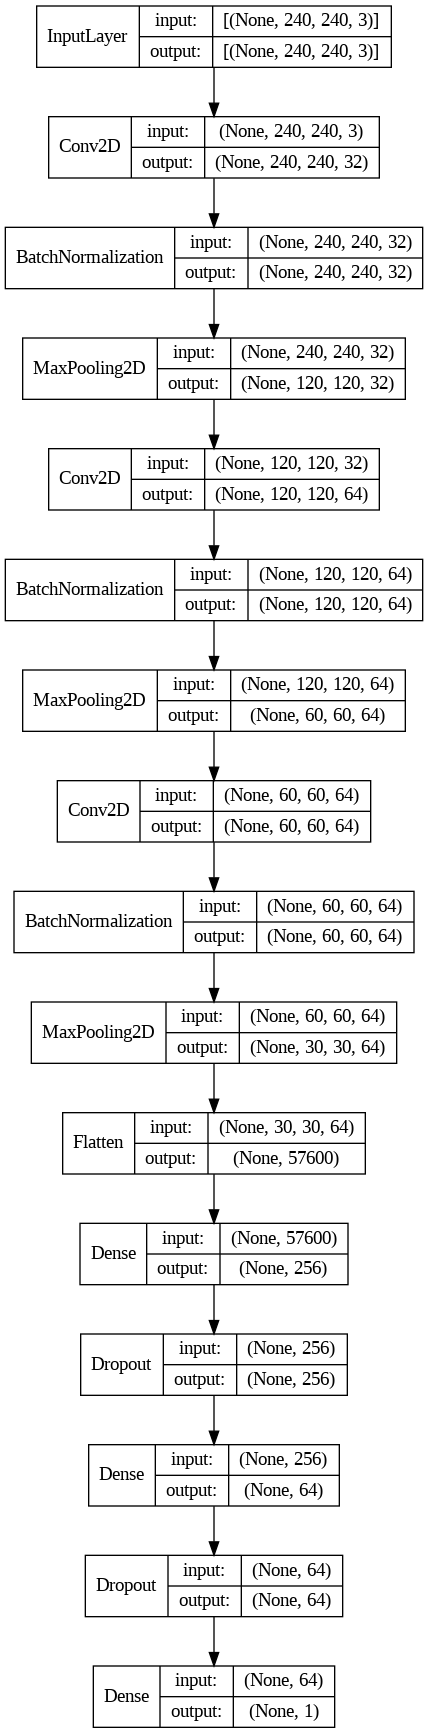

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=False)

In [ ]:
class_weights = {}
for cls in np.unique(y_train):
    count = np.sum(y_train == cls)
    class_weights[cls] = 1.0 / count
print("Class Weights:")
for cls, weight in class_weights.items():
    print(f"Class {cls}: Weight {weight}")

Class Weights:
Class 0: Weight 0.000250501002004008
Class 1: Weight 0.0002494387627837366


In [ ]:
import tensorflow as tf
from sklearn.utils.class_weight import compute_class_weight

# Assuming 'model', 'x_train', 'y_train', 'x_test', and 'y_test' are already defined

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}

# Compile the model
model.compile(
    optimizer=Adam(),
    loss=BinaryCrossentropy(),
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=30,
    class_weight=class_weights_dict,
    validation_data=(x_test, y_test),
    verbose=1
)

Epoch 1/30
251/251 [==============================] - 9s 23ms/step - loss: 0.2659 - accuracy: 0.9736 - val_loss: 0.9024 - val_accuracy: 0.8661
Epoch 2/30
251/251 [==============================] - 5s 21ms/step - loss: 0.2038 - accuracy: 0.9868 - val_loss: 0.8996 - val_accuracy: 0.8191
Epoch 3/30
251/251 [==============================] - 5s 21ms/step - loss: 0.2237 - accuracy: 0.9831 - val_loss: 1.5328 - val_accuracy: 0.8186
Epoch 4/30
251/251 [==============================] - 5s 21ms/step - loss: 0.2315 - accuracy: 0.9829 - val_loss: 0.7918 - val_accuracy: 0.8246
Epoch 5/30
251/251 [==============================] - 5s 21ms/step - loss: 0.2371 - accuracy: 0.9835 - val_loss: 1.3785 - val_accuracy: 0.8046
Epoch 6/30
251/251 [==============================] - 5s 21ms/step - loss: 0.2326 - accuracy: 0.9863 - val_loss: 1.0161 - val_accuracy: 0.6952
Epoch 7/30
251/251 [==============================] - 5s 21ms/step - loss: 0.2395 - accuracy: 0.9854 - val_loss: 0.8467 - val_accuracy: 0.8616

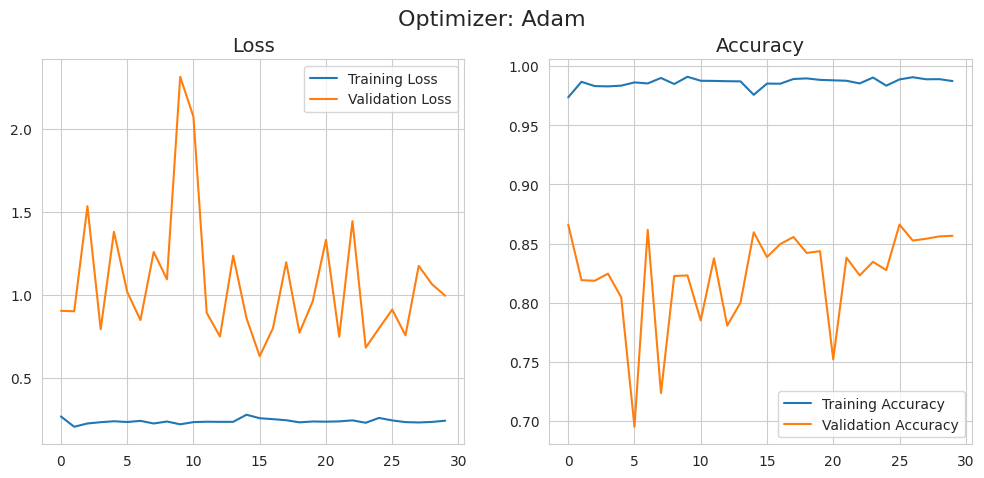

In [ ]:
import seaborn as sns

sns.set_style("whitegrid")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Loss', fontsize=14)
ax1.legend()

ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Accuracy', fontsize=14)
ax2.legend()

fig.suptitle('Optimizer: Adam', fontsize=16)
plt.show()

In [ ]:
# Assuming 'model', 'x_test', and 'y_test' are already defined

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Print the accuracy
print('The accuracy of the baseline model CNN is {:.2f}%!'.format(test_accuracy * 100))

63/63 [==============================] - 0s 7ms/step - loss: 0.9933 - accuracy: 0.8566
The accuracy of the baseline model CNN is 85.66%!
